<a href="https://colab.research.google.com/github/IbtIbeth/Prediccion_KNN_Naive-Bayes_graduados_desertados/blob/main/algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Libreria para separar los datos
from sklearn.model_selection import train_test_split

#Libreria para utilizar knn
from sklearn.neighbors import KNeighborsClassifier


#Librerias para obtener los reportes
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libreria para graficar
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Dropout_Academic Success - Sheet1.csv")

In [ ]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
filtro = df['Target'] != 'Enrolled'
df= df[filtro]

In [ ]:
def normalizar(vector):
    return [(x-min(vector))/(max(vector)-min(vector)) for x in vector]

## KNN

In [ ]:
X = df.drop(['Target', 'Course'], axis = 1)
y = df.Target

In [ ]:
#Normalizamos todas las columnas de X
for x in X.columns.values:
    X[x] = normalizar(X[x].astype(float))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[193  77]
 [ 20 436]]
              precision    recall  f1-score   support

     Dropout       0.91      0.71      0.80       270
    Graduate       0.85      0.96      0.90       456

    accuracy                           0.87       726
   macro avg       0.88      0.84      0.85       726
weighted avg       0.87      0.87      0.86       726

0.8663911845730028


In [ ]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Promedio del error')

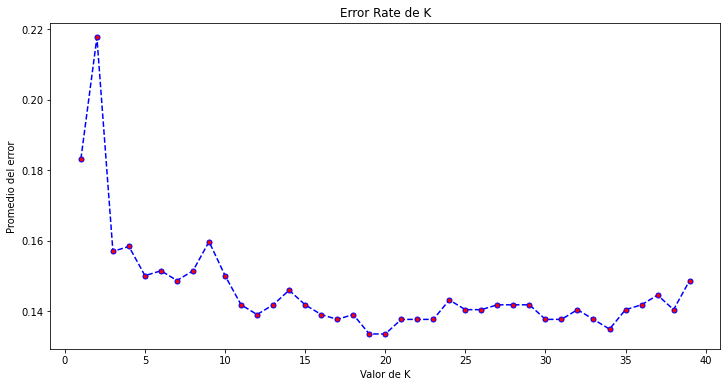

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='.',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate de K')
plt.xlabel('Valor de K')
plt.ylabel('Promedio del error')

## Naive bayes

In [ ]:
#Volvemos a declarar X porque la anterior estan todos los datos normalizados
X = df.drop(['Target','Course'], axis = 1)
y = df.Target

In [ ]:
aux = X[['Previous qualification (grade)','Curricular units 2nd sem (grade)', 'Admission grade', 
   'Age at enrollment','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)',
   'Curricular units 2nd sem (grade)']]

In [ ]:
for x in aux.columns.values:
    X[x] = normalizar(X[x].astype(float))

In [ ]:
def discretizar(data,aux):
    for column in aux:
        data[column][data[column] < 0.20] = 0
        data[column][(data[column] >= 0.20) & (data[column] < 0.40)] = 1
        data[column][(data[column] >= 0.40) & (data[column] < 0.60)] = 2
        data[column][(data[column] >= 0.60) & (data[column] < 0.80)] = 3
        data[column][data[column] >= 80] = 4
    return data

In [ ]:
X = discretizar(X, aux.columns.values)

In [ ]:
def Naive(df_,df2_,y):
    
    df_ = df_.reset_index(drop=True)
    y = y.reset_index(drop=True)
    clases = y.unique()
    
    for index, row in df2_.iterrows(): 
        prediccion = []
        
        for i,x in enumerate(clases):
            li = y[y==x].index.tolist()
            dfAux = df_.iloc[li]
            
            mult = 1
            for n,c in enumerate(row):
                
                col = dfAux.iloc[:,n]
                contador = col[col == c].count()
                suavizar = len(df_.iloc[:,n].unique())
                mult *= (contador + 1) / (len(col)+suavizar)
        
            prediccion.append(mult * ((len(li)+1)/(len(y)+len(y.unique()))))

        df2_.loc[index,['clase']] = clases[prediccion.index(max(prediccion))]
        
    return df2_.clase

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
pred = Naive(X_train,X_test,y_train)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     Dropout       0.87      0.84      0.85       280
    Graduate       0.90      0.92      0.91       446

    accuracy                           0.89       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



In [ ]:
print(confusion_matrix(y_test, pred))

[[234  46]
 [ 36 410]]
